Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1) Delivery_time -> Predict delivery time using sorting time

In [2]:
data = pd.read_csv('/content/Salary_Data.csv')
salary = pd.DataFrame(data)

In [3]:
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


General Inoformation

In [4]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
# Checking duplicate value

In [8]:
salary.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

<Axes: >

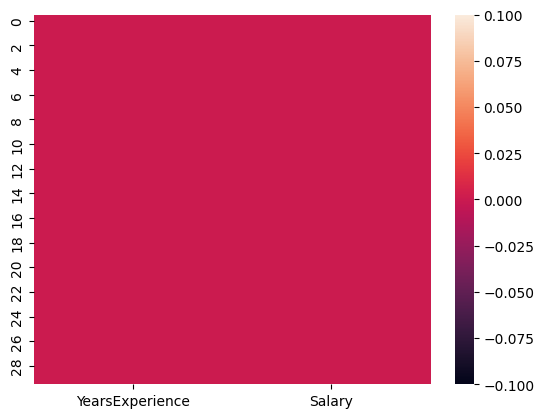

In [9]:

sns.heatmap(salary.isnull())

To check the distrubtion is linear distribution or not.

<Axes: xlabel='YearsExperience', ylabel='Salary'>

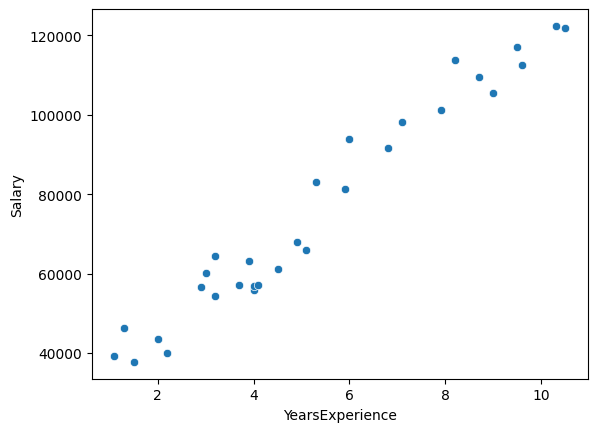

In [10]:
sns.scatterplot(x=salary['YearsExperience'],y=salary['Salary'])

We can see the graph is linearlly distributed

In [11]:
# Check the correrlation of the data

In [12]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [13]:
# Pairplot

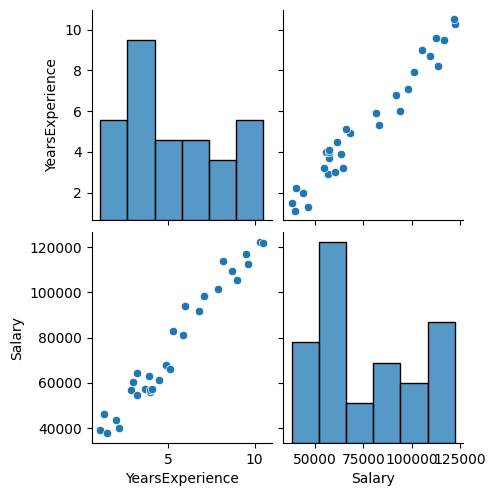

In [14]:
sns.pairplot(salary)

<Axes: >

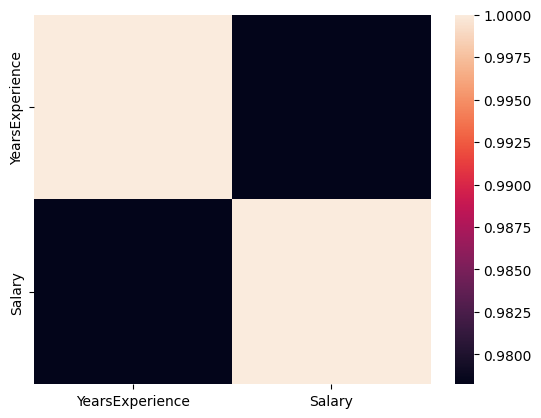

In [15]:
sns.heatmap(salary.corr())

In [16]:
#To check weather the data is normally distributed or not

<ipython-input-17-ab2eeefaaf36>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

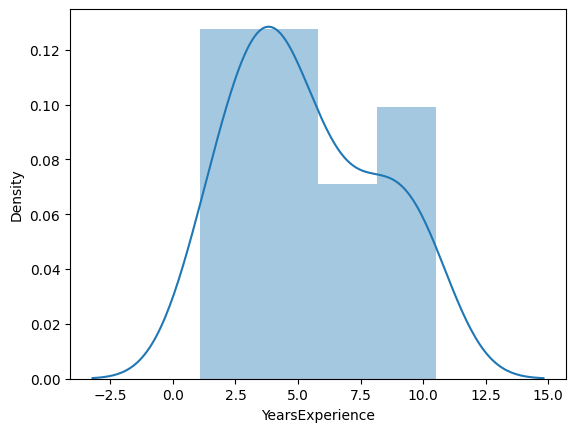

In [17]:
sns.distplot(salary['YearsExperience'])

<ipython-input-18-36cdd9539e89>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

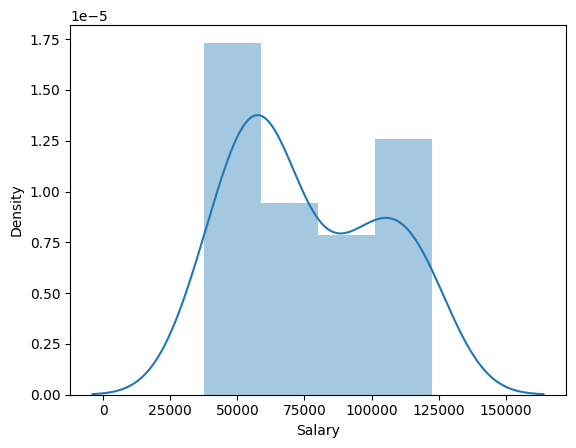

In [18]:
sns.distplot(salary['Salary'])

In [19]:
#Building the model

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [21]:
X=salary['YearsExperience'].values.reshape(-1,1)
y=salary['Salary']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [23]:
y_pred=model.predict(X_test)
y_pred

array([115790.21011287,  71498.27809463, 102596.86866063,  75267.80422384,
        55477.79204548,  60189.69970699])

<Axes: xlabel='YearsExperience', ylabel='Salary'>

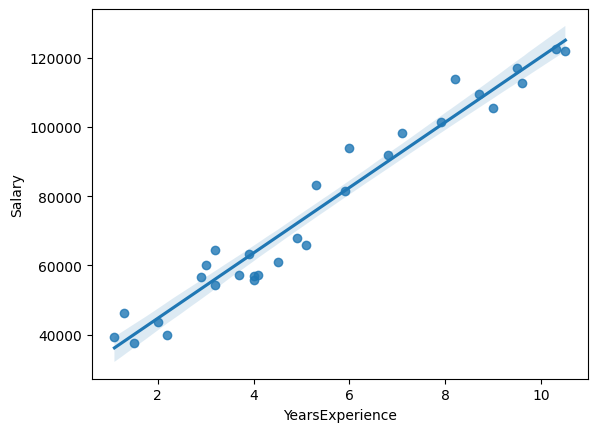

In [24]:
sns.regplot(x='YearsExperience',y='Salary',data=salary)

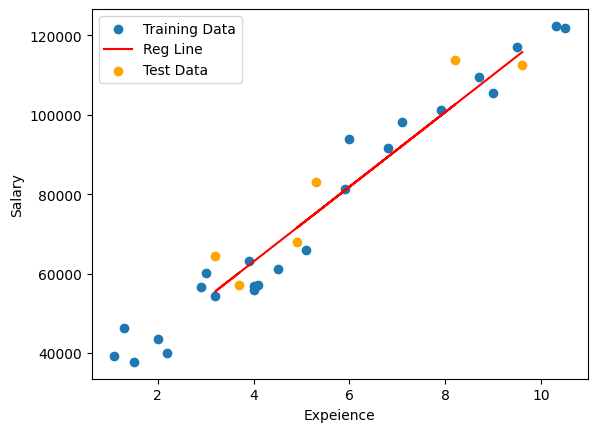

In [25]:
plt.scatter(X_train,y_train, label='Training Data')
plt.plot(X_test, y_pred, color='Red', label='Reg Line')
plt.scatter(X_test,y_test,color='Orange',label='Test Data')
plt.xlabel('Expeience')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [26]:

#Model test

In [27]:
data1 = pd.Series([5,7]) #As the sample data has experience of 5 and 7

In [29]:
data_pred= pd.DataFrame(data1, columns=['Experience'])
data_pred

,Experience
0,5
1,7


In [30]:
model.predict(data_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([72440.65962693, 91288.29027299])

#2) Building prediction model for salary-hike

Geting basic data

In [49]:
Deli =pd.read_csv('/content/delivery_time.csv')
Deli

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [50]:
Deliver =pd.DataFrame(Deli)
Deliver

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [51]:
#Generating basic info


In [52]:
Deliver.shape

(21, 2)

In [53]:
Deliver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [54]:
Deliver.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [39]:
#Renaming the columns

In [55]:
Deliver.rename(columns={'Delivery Time':'Delivery','Sorting Time':'Sorting'},inplace=True)

In [56]:
Deliver['Delivery'].round()

0     21.0
1     14.0
2     20.0
3     24.0
4     29.0
5     15.0
6     19.0
7     10.0
8     18.0
9     19.0
10    20.0
11    11.0
12    17.0
13    12.0
14    12.0
15    15.0
16    14.0
17    18.0
18     8.0
19    18.0
20    22.0
Name: Delivery, dtype: float64

In [58]:
Deliver.head()

,Delivery,Sorting
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [59]:
Deliver.isnull()

,Delivery,Sorting
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [60]:
Deliver.isnull().sum()

Delivery    0
Sorting     0
dtype: int64

<Axes: >

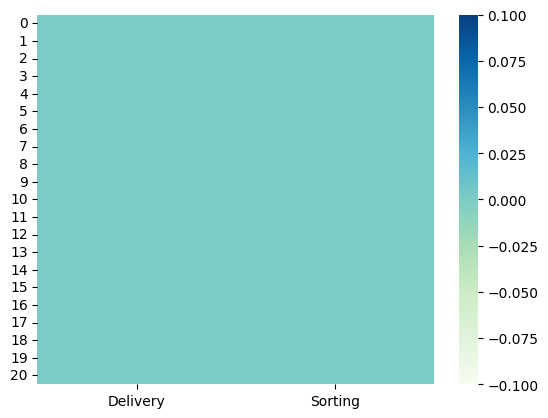

In [62]:
sns.heatmap(Deliver.isnull(),cmap='GnBu') #Heatmap to check the distribution

Let's heck weather the plot is linear Distribution or not

<Axes: xlabel='Delivery', ylabel='Sorting'>

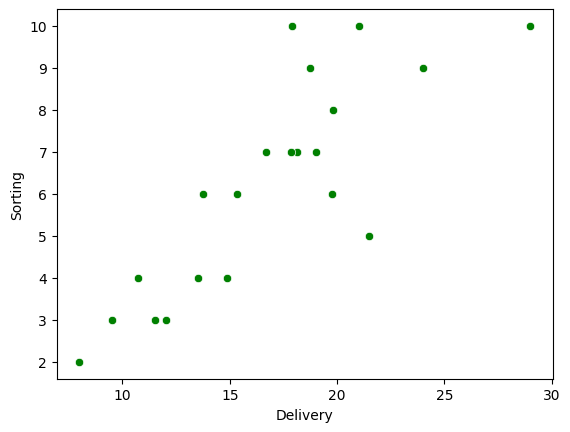

In [64]:
sns.scatterplot(x=Deliver['Delivery'],y=Deliver['Sorting'],color='Green')

Checking the correlation

In [65]:
Deliver.corr()

,Delivery,Sorting
Delivery,1.000000,0.825997
Sorting,0.825997,1.000000


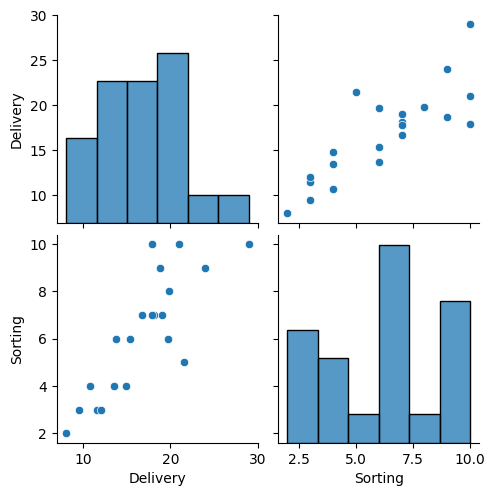

In [67]:
sns.pairplot(Deliver)

In [68]:
#Checking the data is normally distributed or not

<ipython-input-69-54accb3a46dd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Deliver['Delivery'])


<Axes: xlabel='Delivery', ylabel='Density'>

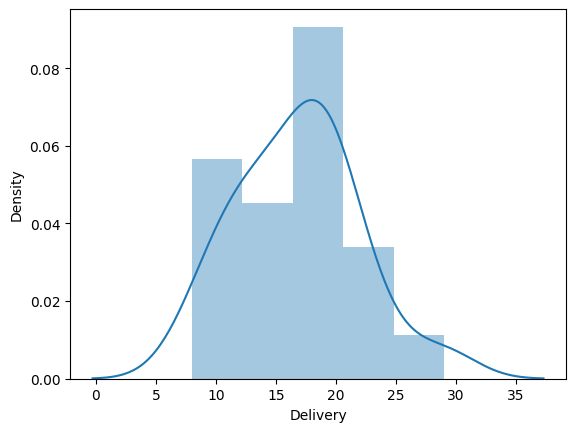

In [69]:
sns.distplot(Deliver['Delivery'])

<ipython-input-70-6f66686c977d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Deliver['Sorting'])


<Axes: xlabel='Sorting', ylabel='Density'>

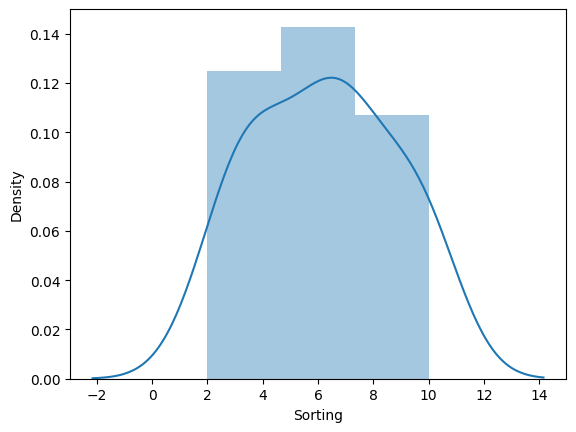

In [70]:
sns.distplot(Deliver['Sorting'])

In [71]:
#Building the model

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [74]:
X= Deliver['Delivery'].values.reshape(-1,1)
y= Deliver['Sorting']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [75]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [76]:
y_pred =model.predict(X_test)
y_pred

array([7.55049807, 6.46609809, 5.25412164, 4.73631127, 6.38730086])

<Axes: xlabel='Delivery', ylabel='Sorting'>

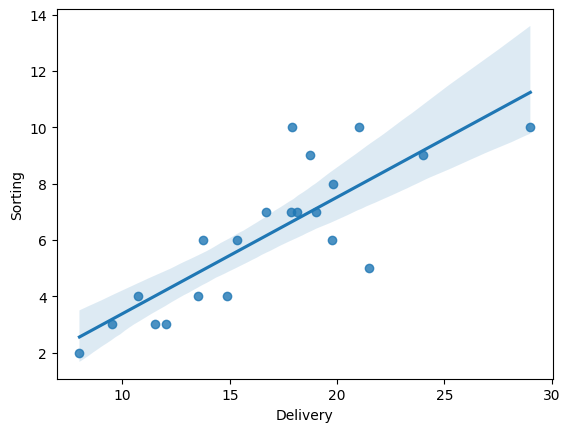

In [78]:
sns.regplot(x='Delivery',y='Sorting',data=Deliver)

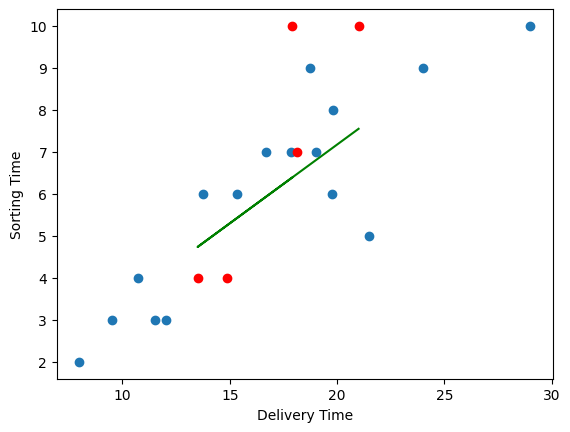

In [80]:
plt.scatter(X_train,y_train,label='Training Data')
plt.plot(X_test,y_pred,color='Green',label='Predicted Data')
plt.scatter(X_test,y_test,color='Red',label='Test Data')
plt.legend
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')
plt.show()

Now Model Testing

In [83]:
Data_new = pd.Series([53,55])

In [84]:
New_data = pd.DataFrame(Data_new,columns=['Delivery Time'])
New_data

,Delivery Time
0,53
1,55


In [85]:
model.predict(New_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([19.55769509, 20.30814491])